In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

In [2]:
drinking_file = "Resources/drinkingwater.csv"
sani_file = "Resources/sanitization.csv"
life_file = "Resources/lifeexpectancy.csv"
hale_file = "Resources/halelife.csv"

In [3]:
drinking_data = pd.read_csv(drinking_file)
sani_data = pd.read_csv(sani_file)
life_data = pd.read_csv(life_file)
hale_data = pd.read_csv(hale_file)

In [4]:
# display drinking_data for preview
drinking_data

,Location,Period,Population using at least basic drinking-water services (%)
0,Afghanistan,2017,57.32
1,Afghanistan,2016,54.84
2,Afghanistan,2015,52.39
3,Afghanistan,2014,49.96
4,Afghanistan,2013,47.56
...,...,...,...
3450,Zimbabwe,2004,57.94
3451,Zimbabwe,2003,58.59
3452,Zimbabwe,2002,59.23
3453,Zimbabwe,2001,59.88


In [5]:
# rename column head "Population using at least basic drinking-water services (%)" to "Percentage" for drinking water data
drinking_df= drinking_data.rename(columns={"Population using at least basic drinking-water services (%)":"Percentage"})
drinking_df.head()

,Location,Period,Percentage
0,Afghanistan,2017,57.32
1,Afghanistan,2016,54.84
2,Afghanistan,2015,52.39
3,Afghanistan,2014,49.96
4,Afghanistan,2013,47.56


In [6]:
# sort dataframe by country for drinking water 
display(drinking_df.sort_values(['Location'], ascending=True))

# display(new_df.sort_values(['Percentage']), ascending=True)

,Location,Period,Percentage
0,Afghanistan,2017,57.32
17,Afghanistan,2000,21.62
16,Afghanistan,2001,21.62
15,Afghanistan,2002,23.60
14,Afghanistan,2003,25.58
...,...,...,...
3439,Zimbabwe,2015,51.03
3438,Zimbabwe,2016,50.42
3437,Zimbabwe,2017,49.80
3444,Zimbabwe,2010,54.14


In [7]:
# get data of countries insterested for drining water
target_countries = pd.DataFrame(drinking_df.query("Location == ['Switzerland', 'Canada', 'Japan', 'Germany', 'Australia', 'United kingdom', 'United states', 'Liberia', 'Nigeria', 'Madagascar']"))
target_countries

,Location,Period,Percentage
144,Australia,2017,100.00
145,Australia,2016,100.00
146,Australia,2015,100.00
147,Australia,2014,100.00
148,Australia,2013,99.95
...,...,...,...
3003,Switzerland,2004,100.00
3004,Switzerland,2003,100.00
3005,Switzerland,2002,100.00
3006,Switzerland,2001,100.00


In [8]:
# get data of years 2000 and 2010 for drinking water
year_2000 = pd.DataFrame(target_countries.query("Period == '2000'"))
year_2010 = pd.DataFrame(target_countries.query("Period == '2010'"))

years = [year_2000,year_2010]

for year in years:
    display(year.sort_values(['Percentage'], ascending=True))

,Location,Period,Percentage
1831,Madagascar,2000,23.79
2256,Nigeria,2000,34.88
1759,Liberia,2000,49.53
575,Canada,2000,98.18
1561,Japan,2000,98.49
161,Australia,2000,99.06
1201,Germany,2000,100.00
3007,Switzerland,2000,100.00


,Location,Period,Percentage
1821,Madagascar,2010,30.98
2246,Nigeria,2010,46.96
1749,Liberia,2010,57.74
565,Canada,2010,98.50
1551,Japan,2010,98.73
151,Australia,2010,99.71
1191,Germany,2010,100.00
2997,Switzerland,2010,100.00


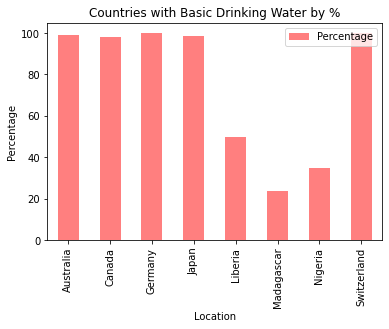

In [9]:
# Year 2000 bar chart of targeted countries' basic drinking services %
year_2000_bar = year_2000.plot.bar('Location', 'Percentage', color = 'red', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by %')
plt.xlabel("Location")
plt.ylabel("Percentage")

plt.savefig("My Project Images/2000 Countries with Basic Drinking Water.png", bbox_inches ="tight")

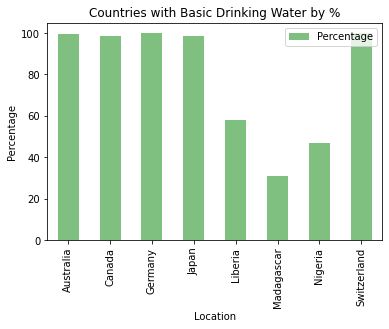

In [10]:
# Year 2010 bar chart of targeted countries' basic drinking services %
year_2010_bar = year_2010.plot.bar('Location', 'Percentage', color = 'green', alpha = 0.5)
    # alpha gives the shade of the color, ranging between 0-1

plt.title('Countries with Basic Drinking Water by %')
plt.xlabel("Location")
plt.ylabel("Percentage")

plt.savefig("My Project Images/2010 Countries with Basic Drinking Water.png", bbox_inches ="tight")

In [11]:
merged_drinking_df = pd.merge(year_2000, year_2010, on = "Location", how= "left")

merged_drinking_df = merged_drinking_df.reset_index()
merged_drinking_df

,index,Location,Period_x,Percentage_x,Period_y,Percentage_y
0,0,Australia,2000,99.06,2010,99.71
1,1,Canada,2000,98.18,2010,98.50
2,2,Germany,2000,100.00,2010,100.00
3,3,Japan,2000,98.49,2010,98.73
4,4,Liberia,2000,49.53,2010,57.74
5,5,Madagascar,2000,23.79,2010,30.98
6,6,Nigeria,2000,34.88,2010,46.96
7,7,Switzerland,2000,100.00,2010,100.00
